In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import optuna

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


### Сперва посмотрим данные и обработаем их как сможем

In [2]:
train_data = pd.read_excel('train.xlsx').drop(columns = ['id'])
test_data = pd.read_excel('test.xlsx').drop(columns = ['id'])

In [3]:
train_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,A,A,C,B,D,A,E,G,I,...,0.958553,0.472463,0.236326,0.911721,0.803562,0.469598,0.704721,0.798792,0.374253,7.688752
1,A,B,A,C,B,B,A,E,C,F,...,0.508642,0.295780,0.328089,0.271971,0.750351,0.301007,0.582974,0.320891,0.220297,8.669533
2,A,A,A,A,B,D,A,E,A,I,...,0.605745,0.836230,0.655742,0.916106,0.826883,0.416197,0.700432,0.577459,0.796923,6.868574
3,A,A,A,A,B,C,A,E,G,H,...,0.795190,0.662467,0.580152,0.620444,0.890827,0.758058,0.698421,0.678791,0.531720,6.773459
4,A,A,A,C,B,D,A,E,G,I,...,0.199558,0.561308,0.677879,0.921805,0.803251,0.675312,0.692701,0.838460,0.777564,7.131832


In [4]:
test_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,A,A,A,A,B,B,A,E,C,F,...,0.280061,0.384081,0.829964,0.240121,0.523022,0.413307,0.664018,0.708817,0.330381,0.334523
1,A,B,A,C,B,D,A,E,E,J,...,0.588796,0.897957,0.399543,0.860751,0.271867,0.326639,0.469859,0.687927,0.885243,0.752462
2,A,B,A,A,B,D,A,D,A,L,...,0.439177,0.837494,0.479945,0.566507,0.747410,0.784108,0.619072,0.695567,0.758771,0.341171
3,A,B,B,C,B,B,A,E,E,I,...,0.483485,0.209018,0.382777,0.248094,0.097396,0.166808,0.287866,0.109905,0.348602,0.390545
4,A,A,A,A,B,C,A,D,G,I,...,0.422830,0.725116,0.373023,0.309856,0.663111,0.351424,0.599259,0.641691,0.302795,0.805870


In [5]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cat0    75000 non-null  object 
 1   cat1    75000 non-null  object 
 2   cat2    75000 non-null  object 
 3   cat3    75000 non-null  object 
 4   cat4    75000 non-null  object 
 5   cat5    75000 non-null  object 
 6   cat6    75000 non-null  object 
 7   cat7    75000 non-null  object 
 8   cat8    75000 non-null  object 
 9   cat9    75000 non-null  object 
 10  cont0   75000 non-null  float64
 11  cont1   75000 non-null  float64
 12  cont2   75000 non-null  float64
 13  cont3   75000 non-null  float64
 14  cont4   75000 non-null  float64
 15  cont5   75000 non-null  float64
 16  cont6   75000 non-null  float64
 17  cont7   75000 non-null  float64
 18  cont8   75000 non-null  float64
 19  cont9   75000 non-null  float64
 20  cont10  75000 non-null  float64
 21  cont11  75000 non-null  float64
 22

In [6]:
train_data['target'].nunique

<bound method IndexOpsMixin.nunique of 0        7.688752
1        8.669533
2        6.868574
3        6.773459
4        7.131832
           ...   
74995    6.398146
74996    8.462815
74997    8.761152
74998    8.448794
74999    7.886710
Name: target, Length: 75000, dtype: float64>

In [7]:
train_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

Приятное задание, нету пропущенных данных, глаз радуется

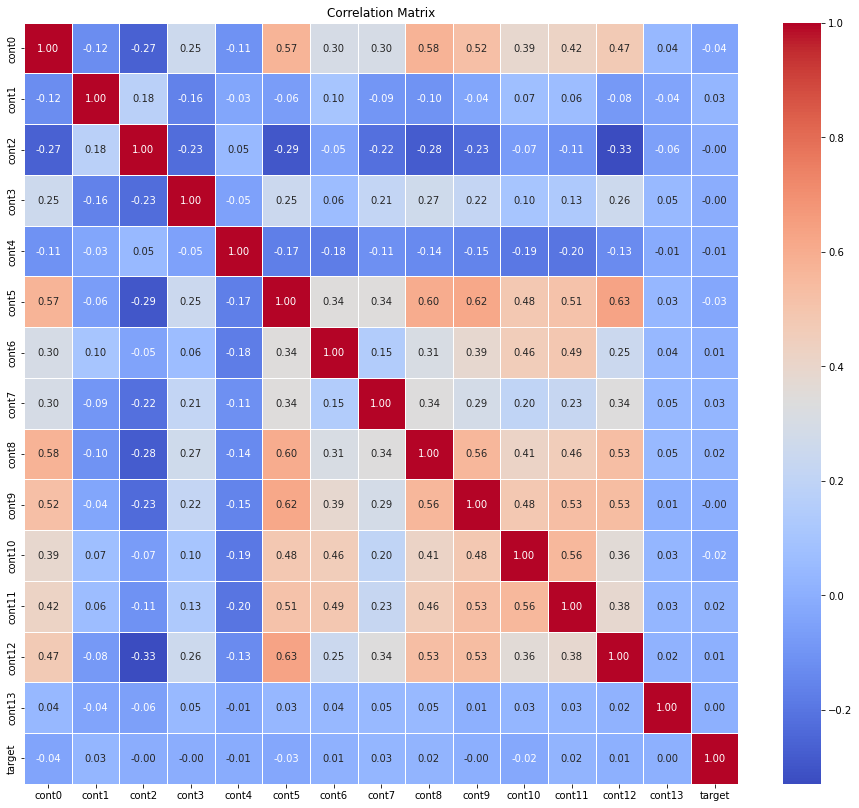

In [8]:
# Корреляционная матрица
correlation_matrix = train_data.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

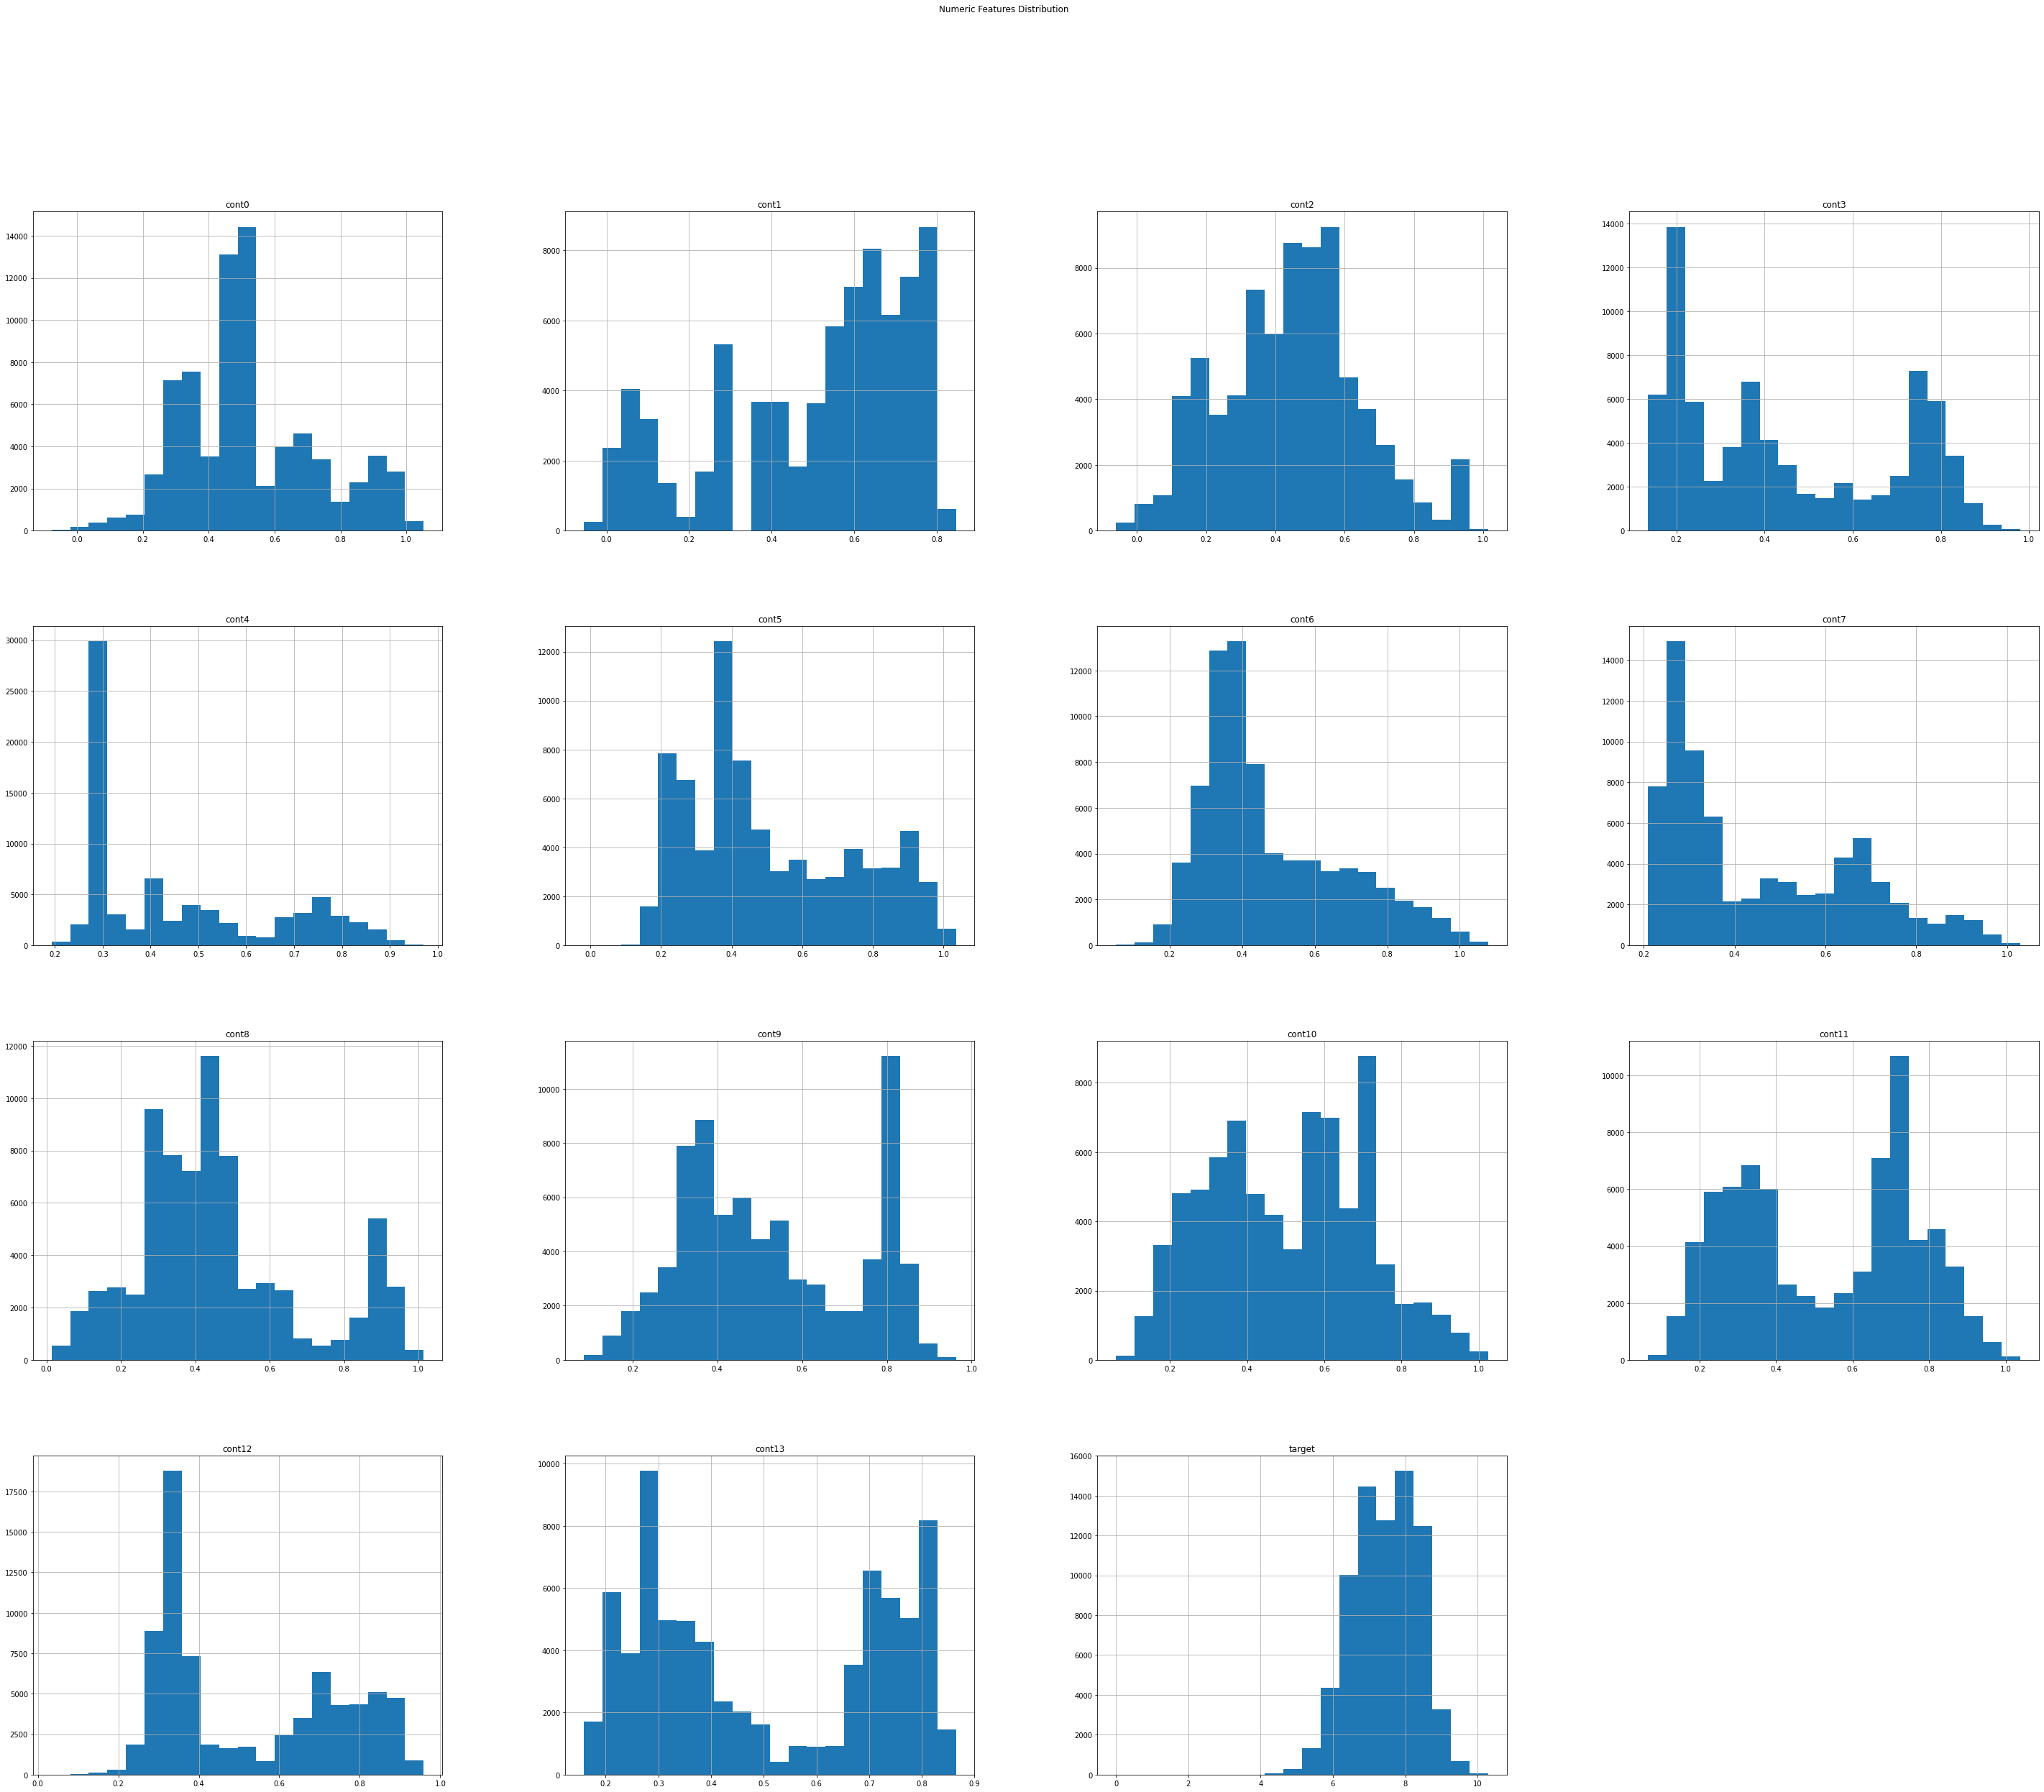

In [9]:
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numeric_features].hist(figsize=(50, 40), bins=20)
plt.suptitle('Numeric Features Distribution')
plt.show()

In [10]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9'],
      dtype='object')


In [11]:
train_data[categorical_columns]

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,A,A,A,C,B,D,A,E,G,I
1,A,B,A,C,B,B,A,E,C,F
2,A,A,A,A,B,D,A,E,A,I
3,A,A,A,A,B,C,A,E,G,H
4,A,A,A,C,B,D,A,E,G,I
...,...,...,...,...,...,...,...,...,...,...
74995,A,B,A,C,B,B,A,G,E,G
74996,A,B,A,C,B,B,A,E,E,L
74997,A,B,B,C,B,B,A,E,A,L
74998,B,B,A,C,B,B,A,E,E,I


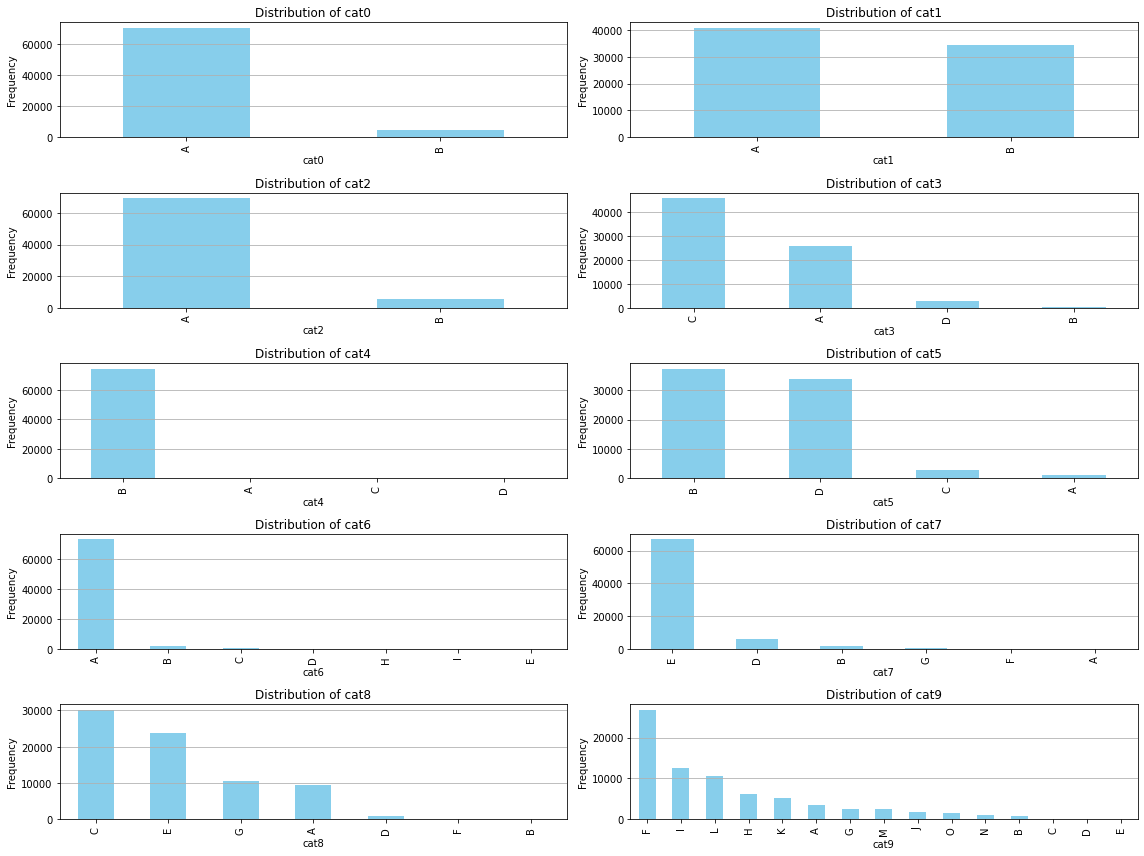

In [12]:
num_cols = 2  # Количество графиков в одной строке
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12)) 

for i, column in enumerate(categorical_columns):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    train_data[column].value_counts().plot(kind='bar', color='skyblue', ax=ax) 
    ax.set_title(f'Distribution of {column}') 
    ax.set_xlabel(column) 
    ax.set_ylabel('Frequency')  
    ax.grid(axis='y') 

plt.tight_layout()
plt.show()

Пройдёмся Label Encoder (тк уникальных значений в столбцах немного) по кат фичам

In [13]:
label_encoders = {}  # Создание словаря для хранения LabelEncoder'ов для каждой колонки

for column in categorical_columns:
    if column in train_data.columns:  
        label_encoders[column] = LabelEncoder()
        train_data[column] = label_encoders[column].fit_transform(train_data[column])

In [15]:
train_data

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,0,0,0,2,1,3,0,3,6,8,...,0.958553,0.472463,0.236326,0.911721,0.803562,0.469598,0.704721,0.798792,0.374253,7.688752
1,0,1,0,2,1,1,0,3,2,5,...,0.508642,0.295780,0.328089,0.271971,0.750351,0.301007,0.582974,0.320891,0.220297,8.669533
2,0,0,0,0,1,3,0,3,0,8,...,0.605745,0.836230,0.655742,0.916106,0.826883,0.416197,0.700432,0.577459,0.796923,6.868574
3,0,0,0,0,1,2,0,3,6,7,...,0.795190,0.662467,0.580152,0.620444,0.890827,0.758058,0.698421,0.678791,0.531720,6.773459
4,0,0,0,2,1,3,0,3,6,8,...,0.199558,0.561308,0.677879,0.921805,0.803251,0.675312,0.692701,0.838460,0.777564,7.131832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0,1,0,2,1,1,0,5,4,6,...,0.233843,0.237642,0.257707,0.175737,0.311700,0.220875,0.221024,0.265483,0.372857,6.398146
74996,0,1,0,2,1,1,0,3,4,11,...,0.278570,0.354770,0.265796,0.279097,0.221921,0.510363,0.172975,0.488910,0.822809,8.462815
74997,0,1,1,2,1,1,0,3,0,11,...,0.919099,0.404440,0.290938,0.566131,0.798530,0.349192,0.744469,0.884347,0.822269,8.761152
74998,1,1,0,2,1,1,0,3,4,8,...,0.235872,0.370894,0.246917,0.463268,0.345792,0.529777,0.367946,0.328052,0.363655,8.448794


Проверим фичи на важность

In [16]:
X = train_data.drop('target', axis=1)
y = train_data['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Стандартизируем 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 200),
    }

    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmsle = mean_squared_log_error(y_test, y_pred) ** 0.5  # RMSLE метрика
    return -rmsle

# Создание и оптимизация study
study = optuna.create_study(direction='maximize')  # Максимизация для минимизации отрицательной метрики
study.optimize(objective, n_trials=20)

[I 2023-12-26 13:26:04,737] A new study created in memory with name: no-name-cb2b12ff-01a9-447e-ab1a-91ba8a48c4b7


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:05,649] Trial 0 finished with value: -0.10444031044800475 and parameters: {'learning_rate': 0.011826118322882807, 'num_leaves': 154}. Best is trial 0 with value: -0.10444031044800475.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:06,324] Trial 1 finished with value: -0.10350961051553037 and parameters: {'learning_rate': 0.03025005770343935, 'num_leaves': 96}. Best is trial 1 with value: -0.10350961051553037.
[I 2023-12-26 13:26:06,606] Trial 2 finished with value: -0.10455669832673696 and parameters: {'learning_rate': 0.023902946026644226, 'num_leaves': 10}. Best is trial 1 with value: -0.10350961051553037.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:07,330] Trial 3 finished with value: -0.10326004927269163 and parameters: {'learning_rate': 0.05051050407329627, 'num_leaves': 138}. Best is trial 3 with value: -0.10326004927269163.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:07,698] Trial 4 finished with value: -0.10295753434444174 and parameters: {'learning_rate': 0.07823400018979446, 'num_leaves': 37}. Best is trial 4 with value: -0.10295753434444174.
[I 2023-12-26 13:26:07,957] Trial 5 finished with value: -0.10331426927934043 and parameters: {'learning_rate': 0.07741201314545498, 'num_leaves': 11}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:08,739] Trial 6 finished with value: -0.10345388171474688 and parameters: {'learning_rate': 0.0830817587179876, 'num_leaves': 193}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:09,500] Trial 7 finished with value: -0.10401511937538578 and parameters: {'learning_rate': 0.017062351043406733, 'num_leaves': 136}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:10,057] Trial 8 finished with value: -0.1031433434233665 and parameters: {'learning_rate': 0.07518303009811977, 'num_leaves': 91}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:10,725] Trial 9 finished with value: -0.10329158106996902 and parameters: {'learning_rate': 0.07534331998220989, 'num_leaves': 125}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:11,205] Trial 10 finished with value: -0.10317798031642074 and parameters: {'learning_rate': 0.052768477664860175, 'num_leaves': 56}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:11,685] Trial 11 finished with value: -0.10316493567531508 and parameters: {'learning_rate': 0.09770663064149317, 'num_leaves': 68}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:12,130] Trial 12 finished with value: -0.1031803429467552 and parameters: {'learning_rate': 0.06432918144876759, 'num_leaves': 52}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:12,676] Trial 13 finished with value: -0.10320077183692083 and parameters: {'learning_rate': 0.09675796093940275, 'num_leaves': 89}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:13,071] Trial 14 finished with value: -0.10315500156854722 and parameters: {'learning_rate': 0.06300319606944649, 'num_leaves': 35}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:13,589] Trial 15 finished with value: -0.10313515972938771 and parameters: {'learning_rate': 0.08800160027046744, 'num_leaves': 80}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:14,016] Trial 16 finished with value: -0.10305522855720156 and parameters: {'learning_rate': 0.08677997259962379, 'num_leaves': 34}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:14,409] Trial 17 finished with value: -0.10308858421319594 and parameters: {'learning_rate': 0.06444681555602472, 'num_leaves': 35}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:14,821] Trial 18 finished with value: -0.10350058524507104 and parameters: {'learning_rate': 0.0378104935783375, 'num_leaves': 31}. Best is trial 4 with value: -0.10295753434444174.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


[I 2023-12-26 13:26:15,286] Trial 19 finished with value: -0.10307394424115057 and parameters: {'learning_rate': 0.08922570083651166, 'num_leaves': 60}. Best is trial 4 with value: -0.10295753434444174.


In [19]:
# Получение лучших параметров
best_params = study.best_params
print(f"Best Parameters: {best_params}")

Best Parameters: {'learning_rate': 0.07823400018979446, 'num_leaves': 37}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3631
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 24
[LightGBM] [Info] Start training from score 7.446340


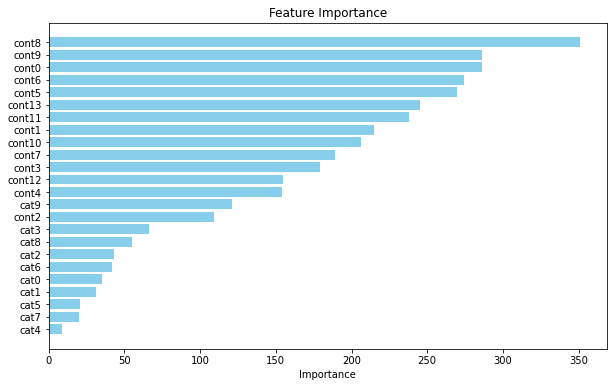

In [20]:
best_lgbm = LGBMRegressor(**best_params)
best_lgbm.fit(X_train, y_train)

# Оценка важности признаков
feature_importance = best_lgbm.feature_importances_
feature_names = X.columns

# Создание датафрейма с важностью признаков
feature_importance_df = pd.DataFrame(list(zip(feature_names, feature_importance)), columns=['Feature', 'Importance'])
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# График важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [21]:
feature_importance_df[feature_importance_df['Importance'] > 30].shape

(21, 2)

In [22]:
feature_importance_df[feature_importance_df['Importance'] > 30]

,Feature,Importance
18,cont8,351
19,cont9,286
10,cont0,286
16,cont6,274
15,cont5,270
23,cont13,245
21,cont11,238
11,cont1,215
20,cont10,206
17,cont7,189


In [23]:
# Отберём самые важные фичи по результатам выше и моей субъективной оценки значимости (больше 30)

top_features = feature_importance_df['Feature'][:20]

# Создание нового датафрейма, включающего только выбранные фичи
selected_features_df = X[top_features]

In [24]:
top_features

18     cont8
19     cont9
10     cont0
16     cont6
15     cont5
23    cont13
21    cont11
11     cont1
20    cont10
17     cont7
13     cont3
22    cont12
14     cont4
9       cat9
12     cont2
3       cat3
8       cat8
2       cat2
6       cat6
0       cat0
Name: Feature, dtype: object

In [25]:
selected_features_df

,cont8,cont9,cont0,cont6,cont5,cont13,cont11,cont1,cont10,cont7,cont3,cont12,cont4,cat9,cont2,cat3,cat8,cat2,cat6,cat0
0,0.911721,0.803562,0.267516,0.472463,0.958553,0.374253,0.704721,0.419372,0.469598,0.236326,0.321471,0.798792,0.279484,8,0.732209,2,6,0,0,0
1,0.271971,0.750351,0.489090,0.295780,0.508642,0.220297,0.582974,0.618591,0.301007,0.328089,0.867301,0.320891,0.326803,5,0.334681,2,2,0,0,0
2,0.916106,0.826883,0.597735,0.836230,0.605745,0.796923,0.700432,0.291089,0.416197,0.655742,0.733536,0.577459,0.279816,8,0.306022,0,0,0,0,0
3,0.620444,0.890827,0.638333,0.662467,0.795190,0.531720,0.698421,0.724528,0.758058,0.580152,0.742256,0.678791,0.728416,7,0.163689,0,6,0,0,0
4,0.921805,0.803251,0.606602,0.561308,0.199558,0.777564,0.692701,0.551567,0.675312,0.677879,0.724906,0.838460,0.483208,8,0.217518,2,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.175737,0.311700,0.322800,0.237642,0.233843,0.372857,0.221024,0.239742,0.220875,0.257707,0.785408,0.265483,0.500663,6,0.497409,2,4,0,0,0
74996,0.279097,0.221921,0.419906,0.354770,0.278570,0.822809,0.172975,0.106240,0.510363,0.265796,0.339758,0.488910,0.719664,11,0.492242,2,4,0,0,0
74997,0.566131,0.798530,0.882661,0.404440,0.919099,0.822269,0.744469,0.552313,0.349192,0.290938,0.776226,0.884347,0.780098,11,0.511325,2,0,1,0,0
74998,0.463268,0.345792,0.497000,0.370894,0.235872,0.363655,0.367946,0.487044,0.529777,0.246917,0.766395,0.328052,0.351622,8,0.334106,2,4,0,0,1


In [26]:
top_features = selected_features_df.columns

In [27]:
top_features

Index(['cont8', 'cont9', 'cont0', 'cont6', 'cont5', 'cont13', 'cont11',
       'cont1', 'cont10', 'cont7', 'cont3', 'cont12', 'cont4', 'cat9', 'cont2',
       'cat3', 'cat8', 'cat2', 'cat6', 'cat0'],
      dtype='object')

## Теперь мы знаем какие фичи отбирать, можно построить модель смело

In [28]:
train_data = pd.read_excel('train.xlsx').drop(columns = ['id'])
test_data = pd.read_excel('test.xlsx').drop(columns = ['id'])

In [29]:
X = train_data.drop('target', axis=1)
y = train_data['target']

In [30]:
X_top_features = X[top_features]

In [31]:
X_top_features

,cont8,cont9,cont0,cont6,cont5,cont13,cont11,cont1,cont10,cont7,cont3,cont12,cont4,cat9,cont2,cat3,cat8,cat2,cat6,cat0
0,0.911721,0.803562,0.267516,0.472463,0.958553,0.374253,0.704721,0.419372,0.469598,0.236326,0.321471,0.798792,0.279484,I,0.732209,C,G,A,A,A
1,0.271971,0.750351,0.489090,0.295780,0.508642,0.220297,0.582974,0.618591,0.301007,0.328089,0.867301,0.320891,0.326803,F,0.334681,C,C,A,A,A
2,0.916106,0.826883,0.597735,0.836230,0.605745,0.796923,0.700432,0.291089,0.416197,0.655742,0.733536,0.577459,0.279816,I,0.306022,A,A,A,A,A
3,0.620444,0.890827,0.638333,0.662467,0.795190,0.531720,0.698421,0.724528,0.758058,0.580152,0.742256,0.678791,0.728416,H,0.163689,A,G,A,A,A
4,0.921805,0.803251,0.606602,0.561308,0.199558,0.777564,0.692701,0.551567,0.675312,0.677879,0.724906,0.838460,0.483208,I,0.217518,C,G,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.175737,0.311700,0.322800,0.237642,0.233843,0.372857,0.221024,0.239742,0.220875,0.257707,0.785408,0.265483,0.500663,G,0.497409,C,E,A,A,A
74996,0.279097,0.221921,0.419906,0.354770,0.278570,0.822809,0.172975,0.106240,0.510363,0.265796,0.339758,0.488910,0.719664,L,0.492242,C,E,A,A,A
74997,0.566131,0.798530,0.882661,0.404440,0.919099,0.822269,0.744469,0.552313,0.349192,0.290938,0.776226,0.884347,0.780098,L,0.511325,C,A,B,A,A
74998,0.463268,0.345792,0.497000,0.370894,0.235872,0.363655,0.367946,0.487044,0.529777,0.246917,0.766395,0.328052,0.351622,I,0.334106,C,E,A,A,B


In [32]:
categorical_columns = X_top_features.select_dtypes(include=['object']).columns

In [33]:
categorical_columns

Index(['cat9', 'cat3', 'cat8', 'cat2', 'cat6', 'cat0'], dtype='object')

In [34]:
label_encoders = {}  # Создание словаря для хранения LabelEncoder'ов для каждой колонки

for column in categorical_columns:
    if column in X_top_features.columns:  
        label_encoders[column] = LabelEncoder()
        X_top_features[column] = label_encoders[column].fit_transform(X_top_features[column])
        
X_top_features

/tmp/ipykernel_17883/1209174351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top_features[column] = label_encoders[column].fit_transform(X_top_features[column])


,cont8,cont9,cont0,cont6,cont5,cont13,cont11,cont1,cont10,cont7,cont3,cont12,cont4,cat9,cont2,cat3,cat8,cat2,cat6,cat0
0,0.911721,0.803562,0.267516,0.472463,0.958553,0.374253,0.704721,0.419372,0.469598,0.236326,0.321471,0.798792,0.279484,8,0.732209,2,6,0,0,0
1,0.271971,0.750351,0.489090,0.295780,0.508642,0.220297,0.582974,0.618591,0.301007,0.328089,0.867301,0.320891,0.326803,5,0.334681,2,2,0,0,0
2,0.916106,0.826883,0.597735,0.836230,0.605745,0.796923,0.700432,0.291089,0.416197,0.655742,0.733536,0.577459,0.279816,8,0.306022,0,0,0,0,0
3,0.620444,0.890827,0.638333,0.662467,0.795190,0.531720,0.698421,0.724528,0.758058,0.580152,0.742256,0.678791,0.728416,7,0.163689,0,6,0,0,0
4,0.921805,0.803251,0.606602,0.561308,0.199558,0.777564,0.692701,0.551567,0.675312,0.677879,0.724906,0.838460,0.483208,8,0.217518,2,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.175737,0.311700,0.322800,0.237642,0.233843,0.372857,0.221024,0.239742,0.220875,0.257707,0.785408,0.265483,0.500663,6,0.497409,2,4,0,0,0
74996,0.279097,0.221921,0.419906,0.354770,0.278570,0.822809,0.172975,0.106240,0.510363,0.265796,0.339758,0.488910,0.719664,11,0.492242,2,4,0,0,0
74997,0.566131,0.798530,0.882661,0.404440,0.919099,0.822269,0.744469,0.552313,0.349192,0.290938,0.776226,0.884347,0.780098,11,0.511325,2,0,1,0,0
74998,0.463268,0.345792,0.497000,0.370894,0.235872,0.363655,0.367946,0.487044,0.529777,0.246917,0.766395,0.328052,0.351622,8,0.334106,2,4,0,0,1


In [35]:
# Сразу подкорректируем и тестовый цсв
test_data_top_features = test_data[top_features]

label_encoders = {}  # Создание словаря для хранения LabelEncoder'ов для каждой колонки

for column in categorical_columns:
    if column in test_data_top_features.columns:  
        label_encoders[column] = LabelEncoder()
        test_data_top_features[column] = label_encoders[column].fit_transform(test_data_top_features[column])


test_data_top_features

/tmp/ipykernel_17883/1371320586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_top_features[column] = label_encoders[column].fit_transform(test_data_top_features[column])


,cont8,cont9,cont0,cont6,cont5,cont13,cont11,cont1,cont10,cont7,cont3,cont12,cont4,cat9,cont2,cat3,cat8,cat2,cat6,cat0
0,0.523022,0.413307,0.489134,0.829964,0.384081,0.334523,0.708817,0.757253,0.664018,0.240121,0.230724,0.330381,0.280061,5,0.575182,0,2,0,0,0
1,0.271867,0.326639,0.742813,0.399543,0.897957,0.752462,0.687927,0.220378,0.469859,0.860751,0.772706,0.885243,0.588796,9,0.128271,2,4,0,0,0
2,0.747410,0.784108,0.963533,0.479945,0.837494,0.341171,0.695567,0.763875,0.619072,0.566507,0.193295,0.758771,0.439177,11,0.119395,0,0,0,0,0
3,0.097396,0.166808,0.515877,0.382777,0.209018,0.390545,0.109905,0.644381,0.287866,0.248094,0.138887,0.348602,0.483485,8,0.455149,2,4,1,0,0
4,0.663111,0.351424,0.663201,0.373023,0.725116,0.805870,0.641691,0.419985,0.599259,0.309856,0.839456,0.302795,0.422830,8,0.620757,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.301987,0.766310,0.326627,0.409020,0.689258,0.230640,0.496820,0.698022,0.976387,0.252390,0.176608,0.328288,0.647062,13,0.624262,0,2,0,0,0
24996,0.912485,0.826794,0.922283,0.963464,0.909209,0.286688,0.787941,0.634050,0.649230,0.776292,0.817682,0.855426,0.277069,5,0.175315,0,6,0,0,0
24997,0.823740,0.464070,0.127711,0.242604,0.742289,0.196086,0.661242,0.645133,0.650947,0.931210,0.438777,0.600393,0.277245,5,0.231798,2,2,1,0,0
24998,0.581224,0.701723,0.659749,0.309851,0.729991,0.298237,0.587018,0.769455,0.633317,0.810247,0.524773,0.727818,0.274101,5,0.477600,0,6,0,0,0


Теперь короче уже обучаться начнём

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Стандартизируем
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

scaler1 = StandardScaler()
X_top_features = scaler1.fit_transform(X_top_features)
X_test = scaler1.transform(test_data_top_features)

In [40]:
#Снова подберём оптимальные параметры, только уже больше

def objective_lgbm(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 20, 100),
        'random_state': 42,
    }

    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    rmsle = mean_squared_log_error(y_val, y_pred) ** 0.5
    return -rmsle  # Так как мы максимизируем, а оптимизатор Optuna минимизирует

study_lgbm = optuna.create_study(direction='maximize', study_name="LGBM Regression")
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2023-12-26 13:27:52,893] A new study created in memory with name: LGBM Regression


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.43373364961735716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43373364961735716
[LightGBM] [Warning] bagging_fraction is set=0.27070466542508337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.27070466542508337
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.43373364961735716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43373364961735716
[LightGBM] [Warning] bagging_fraction is set=0.27070466542508337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.27070466542508337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memor

[I 2023-12-26 13:27:53,459] Trial 0 finished with value: -0.10461641899600946 and parameters: {'num_leaves': 195, 'learning_rate': 0.07114353109242139, 'feature_fraction': 0.43373364961735716, 'bagging_fraction': 0.27070466542508337, 'bagging_freq': 5, 'n_estimators': 82}. Best is trial 0 with value: -0.10461641899600946.


[LightGBM] [Warning] feature_fraction is set=0.43373364961735716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43373364961735716
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.27070466542508337, subsample=1.0 will be ignored. Current value: bagging_fraction=0.27070466542508337
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9981126947545153, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9981126947545153
[LightGBM] [Warning] bagging_fraction is set=0.23704967480814262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.23704967480814262
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9981126947545153, col

[I 2023-12-26 13:27:53,623] Trial 1 finished with value: -0.10654056816632267 and parameters: {'num_leaves': 8, 'learning_rate': 0.005324791715586566, 'feature_fraction': 0.9981126947545153, 'bagging_fraction': 0.23704967480814262, 'bagging_freq': 4, 'n_estimators': 80}. Best is trial 0 with value: -0.10461641899600946.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.3449732868311757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3449732868311757
[LightGBM] [Warning] bagging_fraction is set=0.2997556590195837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2997556590195837
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.3449732868311757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3449732868311757
[LightGBM] [Warning] bagging_fraction is set=0.2997556590195837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2997556590195837
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

[I 2023-12-26 13:27:54,004] Trial 2 finished with value: -0.10359393668859648 and parameters: {'num_leaves': 77, 'learning_rate': 0.08467199881881289, 'feature_fraction': 0.3449732868311757, 'bagging_fraction': 0.2997556590195837, 'bagging_freq': 1, 'n_estimators': 83}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.3449732868311757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3449732868311757
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.2997556590195837, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2997556590195837
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9537773051087193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9537773051087193
[LightGBM] [Warning] bagging_fraction is set=0.7653328585245508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7653328585245508
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9537773051087193, colsample

[I 2023-12-26 13:27:54,304] Trial 3 finished with value: -0.10432104867131285 and parameters: {'num_leaves': 226, 'learning_rate': 0.07462958896185086, 'feature_fraction': 0.9537773051087193, 'bagging_fraction': 0.7653328585245508, 'bagging_freq': 5, 'n_estimators': 22}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.9537773051087193, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9537773051087193
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.7653328585245508, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7653328585245508
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4255471379978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4255471379978
[LightGBM] [Warning] bagging_fraction is set=0.578413765000401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.578413765000401
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.4255471379978, colsample_bytree=1.0

[I 2023-12-26 13:27:54,601] Trial 4 finished with value: -0.10530064048375225 and parameters: {'num_leaves': 112, 'learning_rate': 0.02315963438141407, 'feature_fraction': 0.4255471379978, 'bagging_fraction': 0.578413765000401, 'bagging_freq': 6, 'n_estimators': 41}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.4255471379978, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4255471379978
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.578413765000401, subsample=1.0 will be ignored. Current value: bagging_fraction=0.578413765000401
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6817165573751073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6817165573751073
[LightGBM] [Warning] bagging_fraction is set=0.5443056465810546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5443056465810546
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6817165573751073, colsample_bytree=

[I 2023-12-26 13:27:54,835] Trial 5 finished with value: -0.104782365237735 and parameters: {'num_leaves': 18, 'learning_rate': 0.02342671352110768, 'feature_fraction': 0.6817165573751073, 'bagging_fraction': 0.5443056465810546, 'bagging_freq': 9, 'n_estimators': 81}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.6817165573751073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6817165573751073
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.5443056465810546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5443056465810546
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.19432062338613562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19432062338613562
[LightGBM] [Warning] bagging_fraction is set=0.8182771113357932, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8182771113357932
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.19432062338613562, colsam

[I 2023-12-26 13:27:55,112] Trial 6 finished with value: -0.10389388275188495 and parameters: {'num_leaves': 78, 'learning_rate': 0.08996019427325909, 'feature_fraction': 0.19432062338613562, 'bagging_fraction': 0.8182771113357932, 'bagging_freq': 8, 'n_estimators': 64}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.19432062338613562, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19432062338613562
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.8182771113357932, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8182771113357932
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.607715637983695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.607715637983695
[LightGBM] [Warning] bagging_fraction is set=0.48306461616536633, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48306461616536633
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.607715637983695, colsampl

[I 2023-12-26 13:27:55,478] Trial 7 finished with value: -0.10715733092542541 and parameters: {'num_leaves': 94, 'learning_rate': 0.0010808432564892102, 'feature_fraction': 0.607715637983695, 'bagging_fraction': 0.48306461616536633, 'bagging_freq': 7, 'n_estimators': 69}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.607715637983695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.607715637983695
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.48306461616536633, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48306461616536633
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.21072560540302868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21072560540302868
[LightGBM] [Warning] bagging_fraction is set=0.5612554237498217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5612554237498217
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.21072560540302868, co

[I 2023-12-26 13:27:55,734] Trial 8 finished with value: -0.10648727294621958 and parameters: {'num_leaves': 205, 'learning_rate': 0.01681087805920225, 'feature_fraction': 0.21072560540302868, 'bagging_fraction': 0.5612554237498217, 'bagging_freq': 10, 'n_estimators': 33}. Best is trial 2 with value: -0.10359393668859648.
[I 2023-12-26 13:27:55,869] Trial 9 finished with value: -0.10481189529163944 and parameters: {'num_leaves': 6, 'learning_rate': 0.08905551671495111, 'feature_fraction': 0.22241968749345292, 'bagging_fraction': 0.35265337319164736, 'bagging_freq': 1, 'n_estimators': 50}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.21072560540302868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.21072560540302868
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.5612554237498217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5612554237498217
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.22241968749345292, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22241968749345292
[LightGBM] [Warning] bagging_fraction is set=0.35265337319164736, subsample=1.0 will be ignored. Current value: bagging_fraction=0.35265337319164736
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.22241968749345292, 

[I 2023-12-26 13:27:56,429] Trial 10 finished with value: -0.10403008924155252 and parameters: {'num_leaves': 164, 'learning_rate': 0.04943533574841256, 'feature_fraction': 0.3889086858159612, 'bagging_fraction': 0.1747738294948545, 'bagging_freq': 1, 'n_estimators': 100}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] feature_fraction is set=0.3889086858159612, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3889086858159612
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.1747738294948545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1747738294948545
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.10185808500824894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10185808500824894
[LightGBM] [Warning] bagging_fraction is set=0.9998666669280873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9998666669280873
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.10185808500824894, colsam

[I 2023-12-26 13:27:56,706] Trial 11 finished with value: -0.1042093802756469 and parameters: {'num_leaves': 73, 'learning_rate': 0.09421700550795153, 'feature_fraction': 0.10185808500824894, 'bagging_fraction': 0.9998666669280873, 'bagging_freq': 8, 'n_estimators': 62}. Best is trial 2 with value: -0.10359393668859648.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.10185808500824894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10185808500824894
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.9998666669280873, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9998666669280873
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.2882640178781604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2882640178781604
[LightGBM] [Warning] bagging_fraction is set=0.8233559345465106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8233559345465106
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq

[I 2023-12-26 13:27:57,095] Trial 12 finished with value: -0.10348118810244333 and parameters: {'num_leaves': 62, 'learning_rate': 0.059976001533215736, 'feature_fraction': 0.2882640178781604, 'bagging_fraction': 0.8233559345465106, 'bagging_freq': 3, 'n_estimators': 97}. Best is trial 12 with value: -0.10348118810244333.


[LightGBM] [Warning] feature_fraction is set=0.2882640178781604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2882640178781604
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.8233559345465106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8233559345465106
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.34716811956983107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34716811956983107
[LightGBM] [Warning] bagging_fraction is set=0.7591561647119359, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7591561647119359
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.34716811956983107, colsam

[I 2023-12-26 13:27:57,552] Trial 13 finished with value: -0.10336280121363356 and parameters: {'num_leaves': 51, 'learning_rate': 0.056162810050094665, 'feature_fraction': 0.34716811956983107, 'bagging_fraction': 0.7591561647119359, 'bagging_freq': 3, 'n_estimators': 100}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.34716811956983107, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34716811956983107
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7591561647119359, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7591561647119359
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7701679696023092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7701679696023092
[LightGBM] [Warning] bagging_fraction is set=0.7685674045717314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7685674045717314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7701679696023092, colsamp

[I 2023-12-26 13:27:58,049] Trial 14 finished with value: -0.10356180834963291 and parameters: {'num_leaves': 53, 'learning_rate': 0.05030576938137837, 'feature_fraction': 0.7701679696023092, 'bagging_fraction': 0.7685674045717314, 'bagging_freq': 3, 'n_estimators': 100}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.7701679696023092, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7701679696023092
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7685674045717314, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7685674045717314
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3071227355769243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3071227355769243
[LightGBM] [Warning] bagging_fraction is set=0.9391436669913796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9391436669913796
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3071227355769243, colsample

[I 2023-12-26 13:27:58,582] Trial 15 finished with value: -0.10341743161707123 and parameters: {'num_leaves': 151, 'learning_rate': 0.06553429625863567, 'feature_fraction': 0.3071227355769243, 'bagging_fraction': 0.9391436669913796, 'bagging_freq': 3, 'n_estimators': 91}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.3071227355769243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3071227355769243
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9391436669913796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9391436669913796
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5124913754445372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5124913754445372
[LightGBM] [Warning] bagging_fraction is set=0.9903773916990783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903773916990783
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5124913754445372, colsample

[I 2023-12-26 13:27:59,165] Trial 16 finished with value: -0.103560887863669 and parameters: {'num_leaves': 146, 'learning_rate': 0.038787216771472066, 'feature_fraction': 0.5124913754445372, 'bagging_fraction': 0.9903773916990783, 'bagging_freq': 3, 'n_estimators': 88}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.5124913754445372, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5124913754445372
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9903773916990783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9903773916990783
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5065393170730973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5065393170730973
[LightGBM] [Warning] bagging_fraction is set=0.8976002892545513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8976002892545513
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5065393170730973, colsample

[I 2023-12-26 13:28:00,038] Trial 17 finished with value: -0.10368244725933956 and parameters: {'num_leaves': 252, 'learning_rate': 0.06408711610438099, 'feature_fraction': 0.5065393170730973, 'bagging_fraction': 0.8976002892545513, 'bagging_freq': 2, 'n_estimators': 88}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.5065393170730973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5065393170730973
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8976002892545513, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8976002892545513
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.10164041976552624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10164041976552624
[LightGBM] [Warning] bagging_fraction is set=0.6937875173358068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6937875173358068
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.10164041976552624, colsam

[I 2023-12-26 13:28:00,392] Trial 18 finished with value: -0.10545567804670264 and parameters: {'num_leaves': 127, 'learning_rate': 0.034395456013284864, 'feature_fraction': 0.10164041976552624, 'bagging_fraction': 0.6937875173358068, 'bagging_freq': 4, 'n_estimators': 70}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.10164041976552624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10164041976552624
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6937875173358068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6937875173358068
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.335316992895773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.335316992895773
[LightGBM] [Warning] bagging_fraction is set=0.8989193689057381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8989193689057381
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[I 2023-12-26 13:28:01,028] Trial 19 finished with value: -0.10355145820019923 and parameters: {'num_leaves': 169, 'learning_rate': 0.07743016510810741, 'feature_fraction': 0.335316992895773, 'bagging_fraction': 0.8989193689057381, 'bagging_freq': 2, 'n_estimators': 93}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.335316992895773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.335316992895773
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8989193689057381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8989193689057381
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6054530068080894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6054530068080894
[LightGBM] [Warning] bagging_fraction is set=0.6811957430702296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6811957430702296
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6054530068080894, colsample_b

[I 2023-12-26 13:28:01,285] Trial 20 finished with value: -0.1040245461622529 and parameters: {'num_leaves': 32, 'learning_rate': 0.05849000005928434, 'feature_fraction': 0.6054530068080894, 'bagging_fraction': 0.6811957430702296, 'bagging_freq': 4, 'n_estimators': 53}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.6054530068080894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6054530068080894
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6811957430702296, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6811957430702296
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.29930714082223675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29930714082223675
[LightGBM] [Warning] bagging_fraction is set=0.9040600782816489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9040600782816489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.29930714082223675, colsam

[I 2023-12-26 13:28:01,664] Trial 21 finished with value: -0.10336733259501257 and parameters: {'num_leaves': 51, 'learning_rate': 0.06062106405975274, 'feature_fraction': 0.29930714082223675, 'bagging_fraction': 0.9040600782816489, 'bagging_freq': 3, 'n_estimators': 96}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.29930714082223675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29930714082223675
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9040600782816489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9040600782816489
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.2918169392026087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2918169392026087
[LightGBM] [Warning] bagging_fraction is set=0.9072720842595773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9072720842595773
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.2918169392026087, colsamp

[I 2023-12-26 13:28:02,051] Trial 22 finished with value: -0.10382704075755626 and parameters: {'num_leaves': 42, 'learning_rate': 0.042318445593407264, 'feature_fraction': 0.2918169392026087, 'bagging_fraction': 0.9072720842595773, 'bagging_freq': 2, 'n_estimators': 91}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.2918169392026087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2918169392026087
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.9072720842595773, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9072720842595773
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.25521459461039026, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25521459461039026
[LightGBM] [Warning] bagging_fraction is set=0.6597602604779338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6597602604779338
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.25521459461039026, colsam

[I 2023-12-26 13:28:02,434] Trial 23 finished with value: -0.10353800247974777 and parameters: {'num_leaves': 105, 'learning_rate': 0.06407709230902008, 'feature_fraction': 0.25521459461039026, 'bagging_fraction': 0.6597602604779338, 'bagging_freq': 6, 'n_estimators': 74}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.25521459461039026, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25521459461039026
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.6597602604779338, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6597602604779338
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4659676929845313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4659676929845313
[LightGBM] [Warning] bagging_fraction is set=0.9443977380427744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9443977380427744
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4659676929845313, colsamp

[I 2023-12-26 13:28:03,074] Trial 24 finished with value: -0.10350257077953051 and parameters: {'num_leaves': 139, 'learning_rate': 0.05440928803778491, 'feature_fraction': 0.4659676929845313, 'bagging_fraction': 0.9443977380427744, 'bagging_freq': 3, 'n_estimators': 93}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.4659676929845313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4659676929845313
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9443977380427744, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9443977380427744
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.35958777387154106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35958777387154106
[LightGBM] [Warning] bagging_fraction is set=0.8342986803167256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8342986803167256
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.35958777387154106, colsam

[I 2023-12-26 13:28:03,384] Trial 25 finished with value: -0.10358430742875499 and parameters: {'num_leaves': 33, 'learning_rate': 0.06989998317912462, 'feature_fraction': 0.35958777387154106, 'bagging_fraction': 0.8342986803167256, 'bagging_freq': 4, 'n_estimators': 76}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.35958777387154106, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35958777387154106
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8342986803167256, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8342986803167256
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.16541892262409116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16541892262409116
[LightGBM] [Warning] bagging_fraction is set=0.7585869082666001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7585869082666001
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.16541892262409116, cols

[I 2023-12-26 13:28:03,881] Trial 26 finished with value: -0.1035657028209696 and parameters: {'num_leaves': 170, 'learning_rate': 0.08072637536228874, 'feature_fraction': 0.16541892262409116, 'bagging_fraction': 0.7585869082666001, 'bagging_freq': 2, 'n_estimators': 86}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.16541892262409116, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16541892262409116
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7585869082666001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7585869082666001
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.32346718503622035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32346718503622035
[LightGBM] [Warning] bagging_fraction is set=0.848440608861412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.848440608861412
[LightGBM] [Warning] bagging_f

[I 2023-12-26 13:28:04,373] Trial 27 finished with value: -0.10359961205760614 and parameters: {'num_leaves': 93, 'learning_rate': 0.04543098700596676, 'feature_fraction': 0.32346718503622035, 'bagging_fraction': 0.848440608861412, 'bagging_freq': 5, 'n_estimators': 94}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.32346718503622035, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.32346718503622035
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.848440608861412, subsample=1.0 will be ignored. Current value: bagging_fraction=0.848440608861412
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5787554664208256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5787554664208256
[LightGBM] [Warning] bagging_fraction is set=0.9405364378887583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9405364378887583
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5787554664208256, colsample

[I 2023-12-26 13:28:05,116] Trial 28 finished with value: -0.10370028591214676 and parameters: {'num_leaves': 121, 'learning_rate': 0.03423317879024747, 'feature_fraction': 0.5787554664208256, 'bagging_fraction': 0.9405364378887583, 'bagging_freq': 3, 'n_estimators': 100}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.5787554664208256, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5787554664208256
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.9405364378887583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9405364378887583
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4569382894902447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4569382894902447
[LightGBM] [Warning] bagging_fraction is set=0.734214517857949, subsample=1.0 will be ignored. Current value: bagging_fraction=0.734214517857949
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4569382894902447, colsample_b

[I 2023-12-26 13:28:05,798] Trial 29 finished with value: -0.10343599337407745 and parameters: {'num_leaves': 185, 'learning_rate': 0.07095600236298515, 'feature_fraction': 0.4569382894902447, 'bagging_fraction': 0.734214517857949, 'bagging_freq': 5, 'n_estimators': 85}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.4569382894902447, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4569382894902447
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.734214517857949, subsample=1.0 will be ignored. Current value: bagging_fraction=0.734214517857949
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.39585102246874776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.39585102246874776
[LightGBM] [Warning] bagging_fraction is set=0.6219117525384115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6219117525384115
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.39585102246874776, colsampl

[I 2023-12-26 13:28:06,244] Trial 30 finished with value: -0.10338989284498702 and parameters: {'num_leaves': 150, 'learning_rate': 0.06684372721626843, 'feature_fraction': 0.39585102246874776, 'bagging_fraction': 0.6219117525384115, 'bagging_freq': 4, 'n_estimators': 77}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.39585102246874776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.39585102246874776
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6219117525384115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6219117525384115
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.42113857362860907, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42113857362860907
[LightGBM] [Warning] bagging_fraction is set=0.6347596315620122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6347596315620122
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.42113857362860907, cols

[I 2023-12-26 13:28:06,721] Trial 31 finished with value: -0.10355184256532464 and parameters: {'num_leaves': 148, 'learning_rate': 0.06749820341283344, 'feature_fraction': 0.42113857362860907, 'bagging_fraction': 0.6347596315620122, 'bagging_freq': 4, 'n_estimators': 77}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.42113857362860907, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42113857362860907
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.6347596315620122, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6347596315620122
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.26486967059131317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.26486967059131317
[LightGBM] [Warning] bagging_fraction is set=0.5067594709460999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5067594709460999
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.26486967059131317, cols

[I 2023-12-26 13:28:07,302] Trial 32 finished with value: -0.1035396412517907 and parameters: {'num_leaves': 195, 'learning_rate': 0.05838823385966329, 'feature_fraction': 0.26486967059131317, 'bagging_fraction': 0.5067594709460999, 'bagging_freq': 4, 'n_estimators': 91}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.26486967059131317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.26486967059131317
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.5067594709460999, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5067594709460999
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.3786160887587692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3786160887587692
[LightGBM] [Warning] bagging_fraction is set=0.43235679707481167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43235679707481167
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.3786160887587692, colsa

[I 2023-12-26 13:28:07,829] Trial 33 finished with value: -0.10363962607353738 and parameters: {'num_leaves': 155, 'learning_rate': 0.055098119215445863, 'feature_fraction': 0.3786160887587692, 'bagging_fraction': 0.43235679707481167, 'bagging_freq': 2, 'n_estimators': 80}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.3786160887587692, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3786160887587692
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.43235679707481167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43235679707481167
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.31565427167424764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31565427167424764
[LightGBM] [Warning] bagging_fraction is set=0.6373488426647533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6373488426647533
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.31565427167424764, cols

[I 2023-12-26 13:28:08,282] Trial 34 finished with value: -0.10350645199789134 and parameters: {'num_leaves': 133, 'learning_rate': 0.07546992656744383, 'feature_fraction': 0.31565427167424764, 'bagging_fraction': 0.6373488426647533, 'bagging_freq': 5, 'n_estimators': 84}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.31565427167424764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.31565427167424764
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.6373488426647533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6373488426647533
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.39929903459375865, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.39929903459375865
[LightGBM] [Warning] bagging_fraction is set=0.7855380905187161, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7855380905187161
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.39929903459375865, cols

[I 2023-12-26 13:28:09,027] Trial 35 finished with value: -0.10357731629746403 and parameters: {'num_leaves': 218, 'learning_rate': 0.08258835875412444, 'feature_fraction': 0.39929903459375865, 'bagging_fraction': 0.7855380905187161, 'bagging_freq': 3, 'n_estimators': 95}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.39929903459375865, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.39929903459375865
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7855380905187161, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7855380905187161
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.16456313469192188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16456313469192188
[LightGBM] [Warning] bagging_fraction is set=0.7046215888340019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7046215888340019
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.16456313469192188, cols

[I 2023-12-26 13:28:09,374] Trial 36 finished with value: -0.10375446963929005 and parameters: {'num_leaves': 109, 'learning_rate': 0.06429169971722934, 'feature_fraction': 0.16456313469192188, 'bagging_fraction': 0.7046215888340019, 'bagging_freq': 6, 'n_estimators': 71}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.16456313469192188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.16456313469192188
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.7046215888340019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7046215888340019
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8297339713519344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8297339713519344
[LightGBM] [Warning] bagging_fraction is set=0.6005297370083067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6005297370083067
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq

[I 2023-12-26 13:28:10,035] Trial 37 finished with value: -0.10371942842215175 and parameters: {'num_leaves': 181, 'learning_rate': 0.0464422362763173, 'feature_fraction': 0.8297339713519344, 'bagging_fraction': 0.6005297370083067, 'bagging_freq': 1, 'n_estimators': 81}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.8297339713519344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8297339713519344
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.6005297370083067, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6005297370083067
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5315392501956769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5315392501956769
[LightGBM] [Warning] bagging_fraction is set=0.869994148816836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.869994148816836
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5315392501956769, colsample_b

[I 2023-12-26 13:28:10,494] Trial 38 finished with value: -0.1035673149198403 and parameters: {'num_leaves': 60, 'learning_rate': 0.05410224964398424, 'feature_fraction': 0.5315392501956769, 'bagging_fraction': 0.869994148816836, 'bagging_freq': 4, 'n_estimators': 89}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.5315392501956769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5315392501956769
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.869994148816836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.869994148816836
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.45937005236423795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45937005236423795
[LightGBM] [Warning] bagging_fraction is set=0.9513016812203432, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9513016812203432
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.45937005236423795, colsampl

[I 2023-12-26 13:28:10,675] Trial 39 finished with value: -0.10471897678990658 and parameters: {'num_leaves': 86, 'learning_rate': 0.0748683825495856, 'feature_fraction': 0.45937005236423795, 'bagging_fraction': 0.9513016812203432, 'bagging_freq': 5, 'n_estimators': 20}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.45937005236423795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45937005236423795
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.9513016812203432, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9513016812203432
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.22916028895204346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22916028895204346
[LightGBM] [Warning] bagging_fraction is set=0.7904569003543489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7904569003543489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.22916028895204346, cols

[I 2023-12-26 13:28:10,955] Trial 40 finished with value: -0.10337909314316611 and parameters: {'num_leaves': 17, 'learning_rate': 0.08674980167970722, 'feature_fraction': 0.22916028895204346, 'bagging_fraction': 0.7904569003543489, 'bagging_freq': 3, 'n_estimators': 96}. Best is trial 13 with value: -0.10336280121363356.


[LightGBM] [Warning] feature_fraction is set=0.22916028895204346, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22916028895204346
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7904569003543489, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7904569003543489
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.233847039085332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.233847039085332
[LightGBM] [Warning] bagging_fraction is set=0.7955964446732142, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7955964446732142
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.233847039085332, colsample_

[I 2023-12-26 13:28:11,242] Trial 41 finished with value: -0.10327730610838692 and parameters: {'num_leaves': 18, 'learning_rate': 0.09820629320484182, 'feature_fraction': 0.233847039085332, 'bagging_fraction': 0.7955964446732142, 'bagging_freq': 3, 'n_estimators': 97}. Best is trial 41 with value: -0.10327730610838692.


[LightGBM] [Warning] feature_fraction is set=0.233847039085332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.233847039085332
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.7955964446732142, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7955964446732142
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.2335258159766585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2335258159766585
[LightGBM] [Warning] bagging_fraction is set=0.8016358591740717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8016358591740717
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.2335258159766585, colsample_b

[I 2023-12-26 13:28:11,538] Trial 42 finished with value: -0.10331374831742798 and parameters: {'num_leaves': 16, 'learning_rate': 0.09673839527376044, 'feature_fraction': 0.2335258159766585, 'bagging_fraction': 0.8016358591740717, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 41 with value: -0.10327730610838692.


[LightGBM] [Warning] feature_fraction is set=0.2335258159766585, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2335258159766585
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.8016358591740717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8016358591740717
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.23520921739206946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23520921739206946
[LightGBM] [Warning] bagging_fraction is set=0.7973932259000809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7973932259000809
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.23520921739206946, colsam

[I 2023-12-26 13:28:11,856] Trial 43 finished with value: -0.10330302219063948 and parameters: {'num_leaves': 22, 'learning_rate': 0.09587957715537035, 'feature_fraction': 0.23520921739206946, 'bagging_fraction': 0.7973932259000809, 'bagging_freq': 2, 'n_estimators': 97}. Best is trial 41 with value: -0.10327730610838692.


[LightGBM] [Warning] feature_fraction is set=0.23520921739206946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.23520921739206946
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.7973932259000809, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7973932259000809
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.15190818639007736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15190818639007736
[LightGBM] [Warning] bagging_fraction is set=0.7240239892475594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7240239892475594
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.15190818639007736, cols

[I 2023-12-26 13:28:12,093] Trial 44 finished with value: -0.10329984997972436 and parameters: {'num_leaves': 19, 'learning_rate': 0.096906669632099, 'feature_fraction': 0.15190818639007736, 'bagging_fraction': 0.7240239892475594, 'bagging_freq': 1, 'n_estimators': 97}. Best is trial 41 with value: -0.10327730610838692.
[I 2023-12-26 13:28:12,207] Trial 45 finished with value: -0.10635223943177069 and parameters: {'num_leaves': 2, 'learning_rate': 0.09785171897648447, 'feature_fraction': 0.17457345752290482, 'bagging_fraction': 0.7267781428466883, 'bagging_freq': 1, 'n_estimators': 31}. Best is trial 41 with value: -0.10327730610838692.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.15190818639007736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15190818639007736
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.7240239892475594, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7240239892475594
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.17457345752290482, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.17457345752290482
[LightGBM] [Warning] bagging_fraction is set=0.7267781428466883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7267781428466883
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_fr

[I 2023-12-26 13:28:12,448] Trial 46 finished with value: -0.10326252673263096 and parameters: {'num_leaves': 20, 'learning_rate': 0.09924957777066928, 'feature_fraction': 0.12788623418575346, 'bagging_fraction': 0.8055766408306821, 'bagging_freq': 1, 'n_estimators': 100}. Best is trial 46 with value: -0.10326252673263096.
[I 2023-12-26 13:28:12,677] Trial 47 finished with value: -0.1033671552575022 and parameters: {'num_leaves': 18, 'learning_rate': 0.09359572691825978, 'feature_fraction': 0.12882514428699046, 'bagging_fraction': 0.802490976726501, 'bagging_freq': 1, 'n_estimators': 97}. Best is trial 46 with value: -0.10326252673263096.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.12882514428699046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12882514428699046
[LightGBM] [Warning] bagging_fraction is set=0.802490976726501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.802490976726501
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.12882514428699046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12882514428699046
[LightGBM] [Warning] bagging_fraction is set=0.802490976726501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.802490976726501
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

[I 2023-12-26 13:28:12,964] Trial 48 finished with value: -0.10318047242204292 and parameters: {'num_leaves': 29, 'learning_rate': 0.09908212919794714, 'feature_fraction': 0.15280804803772433, 'bagging_fraction': 0.8607902063656544, 'bagging_freq': 1, 'n_estimators': 100}. Best is trial 48 with value: -0.10318047242204292.


[LightGBM] [Warning] feature_fraction is set=0.15280804803772433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15280804803772433
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8607902063656544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8607902063656544
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.13758124005154243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13758124005154243
[LightGBM] [Warning] bagging_fraction is set=0.8710869847807304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8710869847807304
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.13758124005154243, cols

[I 2023-12-26 13:28:13,192] Trial 49 finished with value: -0.10338701291449787 and parameters: {'num_leaves': 31, 'learning_rate': 0.09988552581575481, 'feature_fraction': 0.13758124005154243, 'bagging_fraction': 0.8710869847807304, 'bagging_freq': 1, 'n_estimators': 66}. Best is trial 48 with value: -0.10318047242204292.


[LightGBM] [Warning] feature_fraction is set=0.13758124005154243, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.13758124005154243
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8710869847807304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8710869847807304


In [41]:
best_params = study_lgbm.best_params
best_rmsle = study_lgbm.best_value


print(f"Лучшая RMSLE: {-best_rmsle}")
print("Best Hyperparameters:", best_params)

Лучшая RMSLE: 0.10318047242204292
Best Hyperparameters: {'num_leaves': 29, 'learning_rate': 0.09908212919794714, 'feature_fraction': 0.15280804803772433, 'bagging_fraction': 0.8607902063656544, 'bagging_freq': 1, 'n_estimators': 100}


#### Ну и теперь обучимся полностью на нашем train.csv с предсказанием test.csv (на выбранных нами фичах)

In [42]:
model = LGBMRegressor(**best_params)
model.fit(X_top_features, y)
y_pred = model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.15280804803772433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15280804803772433
[LightGBM] [Warning] bagging_fraction is set=0.8607902063656544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8607902063656544
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.15280804803772433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15280804803772433
[LightGBM] [Warning] bagging_fraction is set=0.8607902063656544, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8607902063656544
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

In [43]:
submission = pd.DataFrame()

test = pd.read_excel('test.xlsx')
test_ID = test['id']

submission['id'] = test_ID
submission['prediction'] = y_pred
submission.to_csv('final_submission.csv',index=False)

In [44]:
submission

,id,prediction
0,75001,7.540111
1,75002,7.562219
2,75003,7.456994
3,75004,7.329057
4,75005,6.954259
...,...,...
24995,99996,7.396410
24996,99997,7.578266
24997,99998,7.855843
24998,99999,6.808521
